In [ ]:
!apt-get install python3-OpenCV

In [ ]:
import cv2
import matplotlib
import numpy

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Read image file
image = cv2.imread("/content/boar_5.jpg")
cv2.imshow('boar',image)



In [ ]:
from PIL import Image

# Open image file
image = Image.open("/content/boar_5.jpg")

# Print image size
print(image.size)


(1084, 662)


In [ ]:
import cv2

# Read image file
image = cv2.imread("/content/boar_5.jpg")

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Get intensity value of pixel at (x, y)
x = 10
y = 20
intensity = gray_image[y, x]
print("Pixel at ({}, {}) has intensity value {}".format(x, y, intensity))

# Get dimensions of image
height, width = gray_image.shape
print("Image has size {}x{}".format(width, height))


Pixel at (10, 20) has intensity value 57
Image has size 1084x662


In [ ]:
import cv2

# Read image file
image =  cv2.imread("/content/boar_5.jpg")

# Get image shape (height, width, number of channels)
height, width, channels = image.shape

# Print image shape
print("Height:", height)
print("Width:", width)
print("Channels:", channels)


Height: 662
Width: 1084
Channels: 3


In [ ]:
from PIL import Image

# Open image file
image = Image.open("/content/boar_5.jpg")

# Print image information
print("File format:", image.format)
print("Image mode:", image.mode)
print("Image size:", image.size)
print("Metadata:", image.info)


File format: JPEG
Image mode: RGB
Image size: (1084, 662)
Metadata: {}


In [ ]:
#white background

In [ ]:
from PIL import Image, ImageOps

# Load image and convert to grayscale
image =  Image.open("/content/boar_5.jpg").convert("L")

# Invert image and add white border
inverted = ImageOps.invert(image)
padded = ImageOps.expand(inverted, border=10, fill="white")

# Threshold image and make mask
thresholded = padded.point(lambda x: 255 if x > 100 else 0, mode='1')
mask = thresholded.convert("L")

# Apply mask to original image
result = Image.composite(image, Image.new("RGB", image.size, "white"), mask)

# Save result
result.save("result.jpg")


In [ ]:
import numpy as np
import cv2

# Read image file
image = cv2.imread("/content/boar_5.jpg")

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to create a mask
_, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Apply the mask to the image
result = cv2.bitwise_and(image, image, mask=mask)

# Create a white background
background = 255 * np.ones_like(image)

# Combine the background with the result
white_background = np.where(result==0, background, result)

# Save the output image
cv2.imwrite("white_background.jpg", white_background)

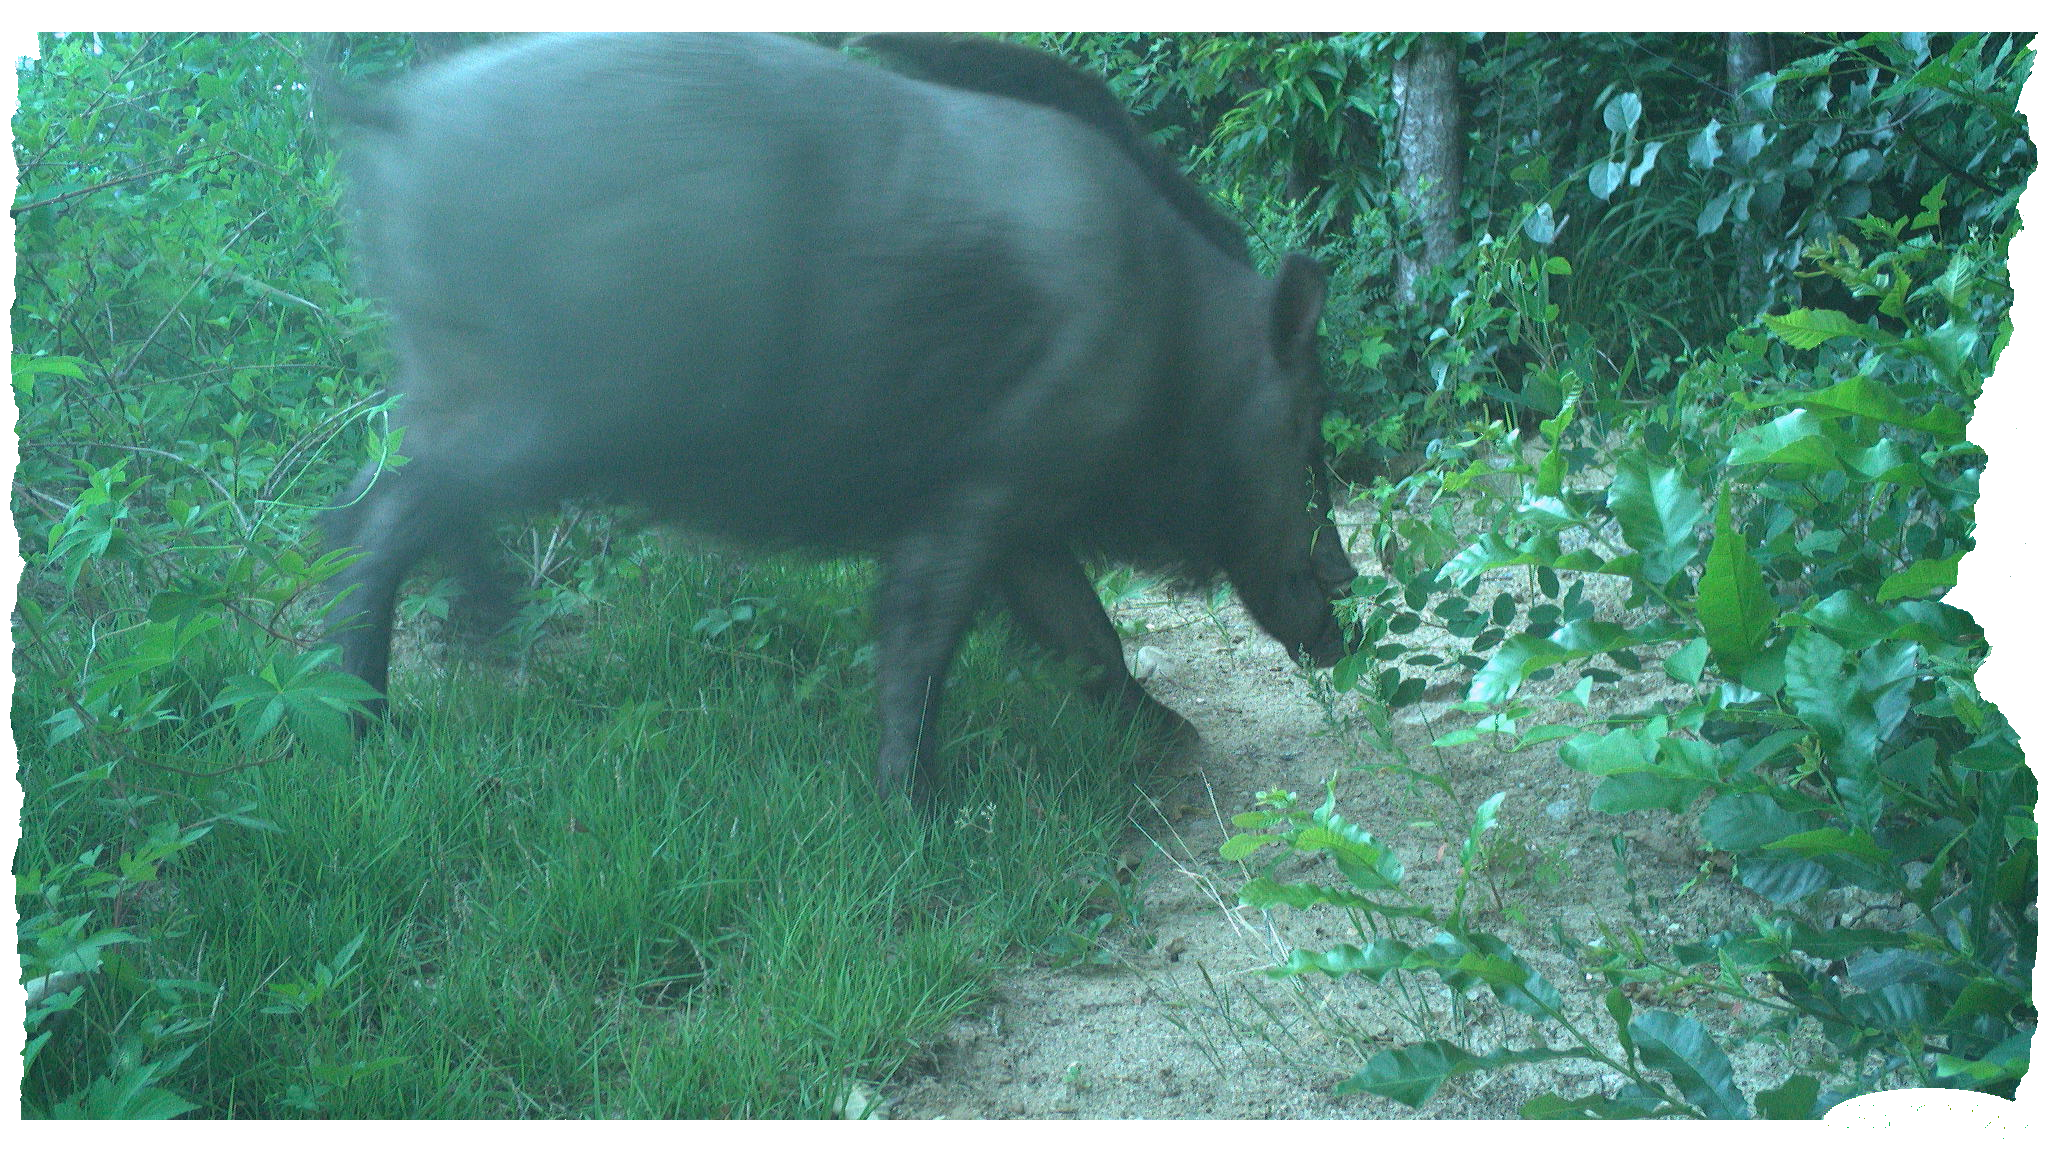

In [63]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load image file
# image = cv2.imread("/content/boar_5.jpg")
image=cv2.imread('/content/drive/MyDrive/boar_all/Copy of Y2567.JPG')

# Create mask for foreground object
mask = np.zeros(image.shape[:2], np.uint8)
background = np.zeros((1, 65), np.float64)
foreground = np.zeros((1, 65), np.float64)
rect = (10, 10, image.shape[1]-20, image.shape[0]-20)
cv2.grabCut(image, mask, rect, background, foreground, 5, cv2.GC_INIT_WITH_RECT)

# Apply mask to extract foreground object
mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
foreground_image = image * mask[:,:,np.newaxis]

# Create white background
background_image = np.full(image.shape, 255, dtype=np.uint8)

# Composite foreground object onto white background
result = background_image.copy()
result[np.where(mask==1)] = foreground_image[np.where(mask==1)]

# Save result image
cv2.imwrite("result.jpg", result)
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()

(1152, 2048)

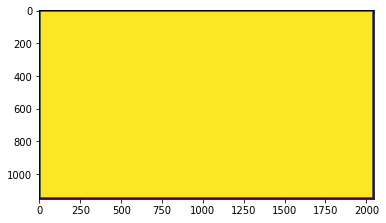

In [49]:
import matplotlib.pyplot as plt
plt.imshow(mask)
np.zeros(image.shape[:2], np.uint8).shape

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Read image file
image = cv2.imread('/content/drive/MyDrive/boar_all/Copy of Y2567.JPG')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold to create a binary mask
ret, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Invert the mask
mask = cv2.bitwise_not(mask)

# Apply the mask to the image
result = cv2.bitwise_and(image, image, mask=mask)

# Create a white background
background = 255 * np.ones_like(image, np.uint8)

# Combine the result with the white background
result1 = cv2.bitwise_or(result, background)
cv2.imwrite("result.jpg", result1)

# Display the result
cv2_imshow( result1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [69]:
pip install  mediapipe

In [70]:
    # DataFlair background removal
# import necessary packages
import os
import cv2
import numpy as np
import mediapipe as mp

# store background images in a list
image_path = '/content/drive/MyDrive/boar_all'
images = os.listdir(image_path)

image_index= 0
bg_image = cv2.imread(image_path+'/'+images[image_index])

In [ ]:
print(len(os.listdir(image_path)))
bg_image.shape

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# load image
img = cv2.imread('/content/drive/MyDrive/boar_all/Copy of Y2567.JPG')

# convert to graky
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold input image as mask
mask = cv2.threshold(gray, 250, 255, cv2.THRESH_BINARY)[1]

# negate mask
mask = 255 - mask

# apply morphology to remove isolated extraneous noise
# use borderconstant of black since foreground touches the edges
kernel = np.ones((3,3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# anti-alias the mask -- blur then stretch
# blur alpha channel
mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)

# linear stretch so that 127.5 goes to 0, but 255 stays 255
mask = (2*(mask.astype(np.float32))-255.0).clip(0,255).astype(np.uint8)

# put mask into alpha channel
result = img.copy()
result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
result[:, :, 3] = mask

# save resulting masked image
cv2.imwrite('person_transp_bckgrnd.png', result)

# display result, though it won't show transparency
cv2_imshow( img)
cv2_imshow( gray)
cv2_imshow( mask)
cv2_imshow( result)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# cv2_imshow( img)
# cv2_imshow( gray)
# cv2_imshow( mask)
cv2_imshow( result)